## Sentiment Analysis of Movie Reviews Using Naive Bayes 🎬

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/ryans/Documents/Machine Learning GCU/Sentiment Analysis/train.tsv/sentiment_train.csv', delimiter=',')

#### Describe Our Dataset

The task is to classify items on a scale of 5 different values. The values are:
+ 0 = Negative 
+ 1 = Somewhat Negative
+ 2 = Neutral
+ 3 = Somewhat Positive
+ 4 = Positive

In [3]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [4]:
df.tail()

,PhraseId,SentenceId,Phrase,Sentiment
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2
156059,156060,8544,chortles,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [6]:
df['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

When plotting a bar graph for our sentiment feature we see that the majority of comments are neutral.

<Axes: title={'center': 'Distribution of Sentiments'}>

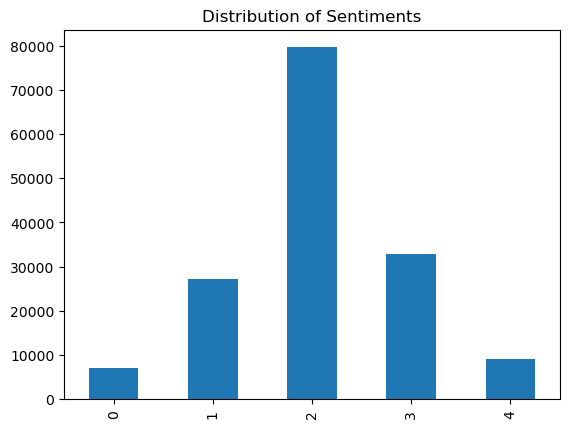

In [8]:
df['Sentiment'].value_counts().sort_index().plot(kind = 'bar', title = 'Distribution of Sentiments')

In [13]:
# 10 occurencies of a 0 sentiment (0 = Negative)
df[df['sentiment'] == 0][:10]

KeyError: 'sentiment'

In [12]:
# 10 occurencies of a 4 sentiment (1 = Positive)
df[df['Sentiment'] == 4][:10]

,PhraseId,SentenceId,Phrase,Sentiment
63,64,2,"This quiet , introspective and entertaining in...",4
66,67,2,"quiet , introspective and entertaining indepen...",4
74,75,2,entertaining,4
77,78,2,is worth seeking,4
117,118,4,A positively thrilling combination of ethnogra...,4
118,119,4,A positively thrilling combination of ethnogra...,4
123,124,4,thrilling,4
166,167,6,A comedy-drama of nearly epic proportions root...,4
172,173,6,nearly epic,4
176,177,6,rooted in a sincere performance by the title c...,4


### Preprocessing